# Лабораторная работа №1

## Задание №1

Функция `linan()`, решающая систему линейных уравнений вида:

\begin{matrix}
    a_{11}x+a_{12}y=b_{1}&(1) \\
    a_{21}x+a_{22}y=b_{2} &(2)
\end{matrix}
​
На вход программа принимает 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты `a` и `b`.

На выходе программа должна выдавать значения `x` и `y` в одну строку через пробел.

In [ ]:
a11, a12, b12 = map(float, input().split())
a21, a22, b22 = map(float, input().split())

# uncomment for test
# a11, a12, b12 = map(float, "3.0 -2 6".split())
# a21, a22, b22 = map(float, "5.0 4 32".split())

def linan(a11: float, a12: float, b12: float, a21: float, a22: float, b22: float) -> tuple:
    """Посчитаем главный определитель (det) и вспомогательные определители (det_x, det_y)"""
    det = a11 * a22 - a12 * a21
    det_x = b12 * a22 - b22 * a12
    det_y = a11 * b22 - a21 * b12

    if det == 0:
        return None

    return (det_x / det, det_y / det)

print(linan(a11, a12, b12, a21, a22, b22))

3.0 -2.0 6.0 5.0 4.0 32.0
(4.0, 3.0)


## Задание №2

Функция `decorate_matrix` получает на вход одно целое число больше единицы.
Функция возвращает матрицу `n` на `n`, у которой на границах стоят единицы, а на всех остальных позициях (если остались позиции не на границах) стоят нули.

**Без использования циклов.**

In [ ]:
import numpy as np


def decorate_matrix(num: int) -> np.array:
    """Создадим матрицу num x num,
    на границах которой стоят 1
    на всех остальных позициях - 0"""
    matrix = np.zeros((num, num))
    matrix[0] = 1
    matrix[-1] = 1
    matrix[0:-1, 0] = 1
    matrix[0:-1, -1] = 1
    return matrix

print(decorate_matrix(3))


[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]


## Задание №3

Реализуем 2 функции:

1. $f(x) = (x+a)^2 - b$
2. $g(x) = |f(x)|$

In [ ]:
def f(x: float, a: float, b: float) -> float:
    """Функция f(x)"""
    return (x + a) ** 2 - b

def g(x: float, a: float, b: float) -> float:
    """Функция g(x)"""
    return abs(f(x, a, b))

Найдем аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$.

Проаналазировав функцию $f(x)$, можно сделать вывод, что минимальное значение функции достигается в точке $x = -a$, так как любое другое значение $x$ будет увеличивать значение функции (из-за квадрата над скобкой). Следовательно, минимальное значение функции $f(x)$ равно $f(-a) = b$. Так как нам нужно найти аргумент функции, то ответом будет $x = -a$.

Функция $g(x)$ принимает только положительные значения, так как мы берем модуль от функции $f(x)$. Следовательно, минимальное значение функции $g(x)$ будет достигаться при $f(x) = 0$. Решим уравнение:

$$(x+a)^2 - b = 0 $$
$$(x+a)^2 = b $$
$$x+a = \sqrt{b} $$
$$x = \sqrt{b} - a$$

In [ ]:
from math import sqrt


def min_f(a: float, b: float) -> float:
    """Минимум функции f(x)"""
    return -a

def min_g(a: float, b: float) -> float:
    """Минимум функции g(x)"""
    return sqrt(b) - a

## Задание №4

Построение графиков для функций из предыдущего задания.

-3
-1.0


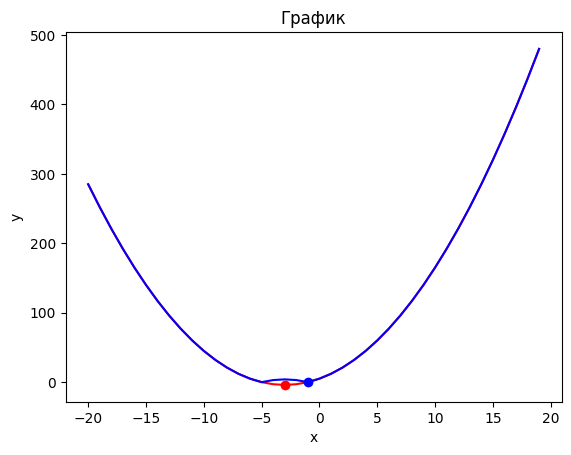

In [ ]:
import matplotlib.pyplot as plt


def generate_points_f(x_values: list, a: float, b: float) -> list:
    y = []

    for x in x_values:
        y.append(f(x, a, b))

    return y

def generate_points_g(x_values: list, a: float, b: float) -> list:
    y = []

    for x in x_values:
        y.append(g(x, a, b))

    return y

# генерируем точки для графиков
x_values = [i for i in range(-20,20)]
y = generate_points_f(x_values, 3, 4)

# графики функций f(x) и g(x)
plt.plot(x_values, generate_points_f(x_values, 3, 4), 'r')  # f(x)
plt.plot(x_values, generate_points_g(x_values, 3, 4), 'b')  # g(x)

print(min_f(3, 4))
print(min_g(3, 4))

# точки минимума
plt.plot([min_f(3, 4)], [f(min_f(3, 4), 3, 4)], 'ro')
plt.plot([min_g(3, 4)], [g(min_g(3, 4), 3, 4)], 'bo')

plt.title('График')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Задание №5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:

from random import randint

def toss_coin() -> int:
    """Подбрасываем монетку"""
    return randint(0, 1)

def toss_coins(n: int) -> list:
    """Подбрасываем монетку n раз"""
    return [toss_coin() for _ in range(n)]

In [ ]:
"""Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?"""

def check_toss_coins(n: int, k: int) -> bool:
    """Проверяем, выпала ли монетка k раз подряд одной стороной"""
    coins = toss_coins(n)
    for i in range(n - k + 1):
        if coins[i:i + k] == [coins[i]] * k:
            return True
    return False

def model(n: int, k: int, m: int) -> float:
    """Моделируем ситуацию m раз"""
    return sum([check_toss_coins(n, k) for _ in range(m)]) / m

print(model(10, 10, 1000) * 100, '%', sep='')

0.2%


In [ ]:
"""Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?"""

print(model(10, 8, 1000) * 100, '%', sep='')

1.7000000000000002%


In [ ]:
"""Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?"""

import random

def experiment():
    sequence = [random.randint(0,1) for _ in range(10)]
    return sequence.count(sequence[0] == 1)

number_experiments = 200_000
number_successfull_experiments = sum(experiment() for _ in range(number_experiments))

print("Probability:", number_successfull_experiments / number_experiments, "%")



Probability: 5.500215 %
